# **Telecom X - Análisis de Evasión de Clientes**

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Deberas recopilar, procesar y analizar los datos, para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

Para ello, deberas:

- ✅ Importar y manipular datos desde una API de manera eficiente.
- ✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
- ✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.
- ✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

## **Extracción de Datos**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
data = pd.read_json(url)
data

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
pd.json_normalize(data.iloc[:,2])

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [4]:
normalize_data = [pd.json_normalize(data.iloc[:,i]) for i in range(2,len(data.columns))]

In [5]:
clean_data = data.iloc[:,0:2]
clean_data = pd.concat([clean_data,*normalize_data],axis=1) 
clean_data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [6]:
# clean_data.to_csv('analisis_evasion_clientes.csv',index=False)
# pd.read_csv('analisis_evasion_clientes.csv')

## **Transformación de Datos**

### Verificando sus tipos de datos e Identificando las columnas más relevantes para el análisis de evasión.


In [7]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías.
 

In [8]:
# Verificando valores nulos
clean_data.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [9]:
# Verificando valores duplicados
clean_data['customerID'].unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], shape=(7267,), dtype=object)

In [10]:
# Verificando erroes de formato e inconsistencias
for i in clean_data.columns:
    print(f'{i} ->  {clean_data[i].unique()}')

customerID ->  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn ->  ['No' 'Yes' '']
gender ->  ['Female' 'Male']
SeniorCitizen ->  [0 1]
Partner ->  ['Yes' 'No']
Dependents ->  ['Yes' 'No']
tenure ->  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService ->  ['Yes' 'No']
MultipleLines ->  ['No' 'Yes' 'No phone service']
InternetService ->  ['DSL' 'Fiber optic' 'No']
OnlineSecurity ->  ['No' 'Yes' 'No internet service']
OnlineBackup ->  ['Yes' 'No' 'No internet service']
DeviceProtection ->  ['No' 'Yes' 'No internet service']
TechSupport ->  ['Yes' 'No' 'No internet service']
StreamingTV ->  ['Yes' 'No' 'No internet service']
StreamingMovies ->  ['No' 'Yes' 'No internet service']
Contract ->  ['One year' 'Month-to-month' 'Two year']
PaperlessBilling ->  ['Yes' 'No']

In [11]:
clean_data = clean_data.replace('No .+','No',regex=True)

In [12]:
for i in clean_data.columns:
    print(f'{i} ->  {clean_data[i].unique()}')

customerID ->  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn ->  ['No' 'Yes' '']
gender ->  ['Female' 'Male']
SeniorCitizen ->  [0 1]
Partner ->  ['Yes' 'No']
Dependents ->  ['Yes' 'No']
tenure ->  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService ->  ['Yes' 'No']
MultipleLines ->  ['No' 'Yes']
InternetService ->  ['DSL' 'Fiber optic' 'No']
OnlineSecurity ->  ['No' 'Yes']
OnlineBackup ->  ['Yes' 'No']
DeviceProtection ->  ['No' 'Yes']
TechSupport ->  ['Yes' 'No']
StreamingTV ->  ['Yes' 'No']
StreamingMovies ->  ['No' 'Yes']
Contract ->  ['One year' 'Month-to-month' 'Two year']
PaperlessBilling ->  ['Yes' 'No']
PaymentMethod ->  ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Monthly ->  [65.6  59.9  73.9  ..

In [13]:
clean_data[clean_data['Charges.Total']==' ']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No,No,No,No,No,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No,No,No,No,No,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No,No,No,No,No,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No,No,No,No,No,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No,No,No,No,No,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [14]:
clean_data['Charges.Total'] = clean_data['Charges.Total'].replace(' ',0)
clean_data['Charges.Total'] = clean_data['Charges.Total'].astype(np.float64)

In [15]:
clean_data['cuenta_diaria'] = clean_data['Charges.Monthly']/30

### Cuenta Diaria

In [16]:
clean_data.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,cuenta_diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


### Estandarización

In [17]:
clean_data.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'cuenta_diaria'],
      dtype='object')

In [18]:
clean_data.columns = ['id','contrato_cancelado','genero','cliente_tercera_edad','conyugue','dependientes','antiguedad(meses)','servicio_telefonico','multilinea','servicio_internet','seguridad_online','respaldos','proteccion_dispositivos','soporte_tecnico','streaming_TV','streaming_movies','tipo_contrato','factura_digital','metodo_pago','cargo_mensual','total_pagado','cuenta_diaria']

In [19]:
clean_data

,id,contrato_cancelado,genero,cliente_tercera_edad,conyugue,dependientes,antiguedad(meses),servicio_telefonico,multilinea,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,streaming_TV,streaming_movies,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,total_pagado,cuenta_diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [20]:
clean_data = clean_data.replace('Yes',True)
clean_data = clean_data.replace('No',False)


/tmp/ipykernel_7384/4158820978.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data = clean_data.replace('No',False)


In [21]:
clean_data['cliente_tercera_edad'] = clean_data['cliente_tercera_edad'].replace(0,False)
clean_data['cliente_tercera_edad'] = clean_data['cliente_tercera_edad'].replace(1,True)
clean_data['cliente_tercera_edad'].unique()

/tmp/ipykernel_7384/2638863565.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data['cliente_tercera_edad'] = clean_data['cliente_tercera_edad'].replace(1,True)


array([False,  True])

In [22]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7267 non-null   object 
 1   contrato_cancelado       7267 non-null   object 
 2   genero                   7267 non-null   object 
 3   cliente_tercera_edad     7267 non-null   bool   
 4   conyugue                 7267 non-null   bool   
 5   dependientes             7267 non-null   bool   
 6   antiguedad(meses)        7267 non-null   int64  
 7   servicio_telefonico      7267 non-null   bool   
 8   multilinea               7267 non-null   bool   
 9   servicio_internet        7267 non-null   object 
 10  seguridad_online         7267 non-null   bool   
 11  respaldos                7267 non-null   bool   
 12  proteccion_dispositivos  7267 non-null   bool   
 13  soporte_tecnico          7267 non-null   bool   
 14  streaming_TV            

In [23]:
clean_data.rename(columns={'servicio_internet':'tipo_conexion'},inplace=True)


In [24]:
clean_data['servicio_internet'] = [i if i is False else True for i in clean_data['tipo_conexion']]

In [25]:
clean_data['tipo_conexion'] = clean_data['tipo_conexion'].replace(False,'sin conexion')

In [26]:
clean_data

,id,contrato_cancelado,genero,cliente_tercera_edad,conyugue,dependientes,antiguedad(meses),servicio_telefonico,multilinea,tipo_conexion,...,soporte_tecnico,streaming_TV,streaming_movies,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,total_pagado,cuenta_diaria,servicio_internet
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,True,True,False,One year,True,Mailed check,65.60,593.30,2.186667,True
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,True,Month-to-month,False,Mailed check,59.90,542.40,1.996667,True
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,False,False,False,Month-to-month,True,Electronic check,73.90,280.85,2.463333,True
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85,3.266667,True
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,True,True,False,Month-to-month,True,Mailed check,83.90,267.40,2.796667,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,False,False,False,13,True,False,DSL,...,True,False,False,One year,False,Mailed check,55.15,742.90,1.838333,True
7263,9992-RRAMN,True,Male,False,True,False,22,True,True,Fiber optic,...,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70,2.836667,True
7264,9992-UJOEL,False,Male,False,False,False,2,True,False,DSL,...,False,False,False,Month-to-month,True,Mailed check,50.30,92.75,1.676667,True
7265,9993-LHIEB,False,Male,False,True,True,67,True,False,DSL,...,True,False,True,Two year,False,Mailed check,67.85,4627.65,2.261667,True


In [27]:
clean_data.insert(clean_data.columns.get_loc('tipo_conexion'),'servicio_internet',clean_data.pop('servicio_internet'))
clean_data.head()


,id,contrato_cancelado,genero,cliente_tercera_edad,conyugue,dependientes,antiguedad(meses),servicio_telefonico,multilinea,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,streaming_TV,streaming_movies,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,total_pagado,cuenta_diaria
0,0002-ORFBO,False,Female,False,True,True,9,True,False,True,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,True,True,True,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,True,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,True,False,True,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,True,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.796667


## **Carga y análisis(L - Load & Analysis)**

In [28]:
df = clean_data.copy()

#### **Exploracion de medidas de Tendencia Central**

In [29]:
df.describe()

,antiguedad(meses),cargo_mensual,total_pagado,cuenta_diaria
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157337
std,24.571773,30.129572,2268.648587,1.004319
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.425000,396.200000,1.180833
50%,29.000000,70.300000,1389.200000,2.343333
75%,55.000000,89.875000,3778.525000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [30]:
df.describe(include=['O'])

,id,contrato_cancelado,genero,tipo_conexion,tipo_contrato,metodo_pago
count,7267,7267,7267,7267,7267,7267
unique,7267,3,2,3,3,4
top,0002-ORFBO,False,Male,Fiber optic,Month-to-month,Electronic check
freq,1,5174,3675,3198,4005,2445


#### **Panorama de cartera de clientes**

In [131]:
values = df['contrato_cancelado'].value_counts()
values

contrato_cancelado
False    5174
True     1869
          224
Name: count, dtype: int64

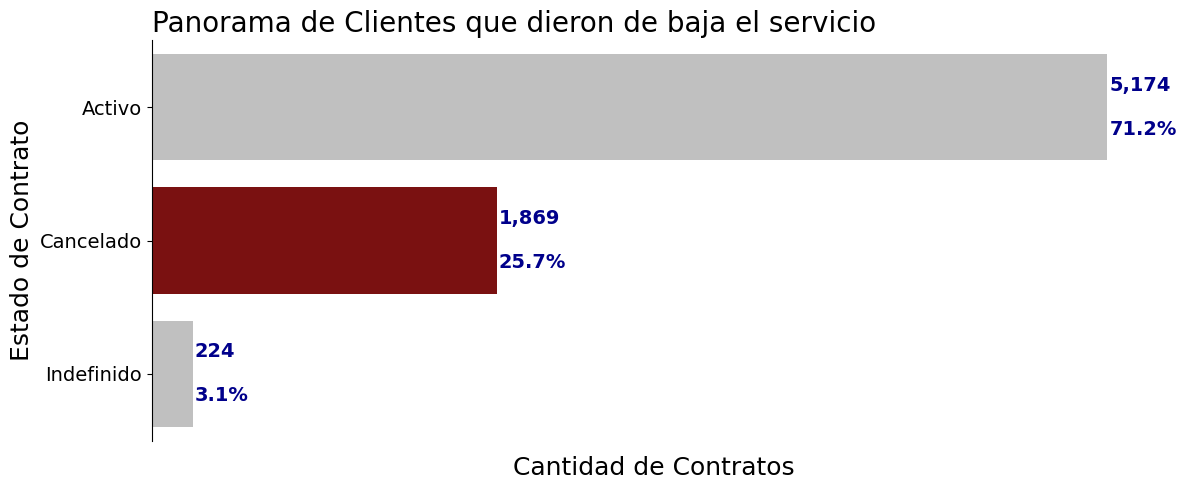

In [182]:
colores = {False:'silver',True:'darkred','':'silver'}
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title('Panorama de Clientes que dieron de baja el servicio',fontsize=20,loc='left')

ax = sns.barplot(y=values.index,x=values.values,hue=values.index,legend=False,orient='h',palette=colores)
ax.set_ylabel('Estado de Contrato',fontsize=18)
ax.set_xlabel('Cantidad de Contratos',fontsize=18)
ax.set_yticks([0,1,2])
ax.set_yticklabels(('Activo','Cancelado','Indefinido'),fontsize=14)
ax.set_xticklabels([])
ax.tick_params(axis='x',which='both',bottom=False)

for i, j in enumerate(values.values):
    ax.text(j+10,i,f'{j:,}\n\n{(j/values.sum())*100:.1f}%',fontweight='bold',color='darkblue',va='center',ha='left',fontsize=14)

ax=sns.despine(bottom=True)
fig.tight_layout()
plt.show()




In [159]:
ex_clientes = df[df['contrato_cancelado']==True]
clientes_conservados = df[df['contrato_cancelado']==False]

In [161]:
ex_clientes['genero'].value_counts()

genero
Female    939
Male      930
Name: count, dtype: int64

In [163]:
clientes_conservados['genero'].value_counts()


genero
Male      2625
Female    2549
Name: count, dtype: int64

In [ ]:
# fig, axs = plt.subplots(figsize=(12,6))


In [164]:
ex_clientes['tipo_contrato'].value_counts()

tipo_contrato
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64

In [165]:
clientes_conservados['tipo_contrato'].value_counts()


tipo_contrato
Month-to-month    2220
Two year          1647
One year          1307
Name: count, dtype: int64

In [166]:
ex_clientes['metodo_pago'].value_counts()

metodo_pago
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: count, dtype: int64

In [167]:
clientes_conservados['metodo_pago'].value_counts()


metodo_pago
Mailed check                 1304
Electronic check             1294
Credit card (automatic)      1290
Bank transfer (automatic)    1286
Name: count, dtype: int64